### Capstone Data Story - Grocery Store Chain 

Author: Tashlin Reddy

Workshop: Datascience Intensive - Springboard

1. Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

2. Get going by asking the following questions and looking for the answers with some code and plots:
    Can you count something interesting?
    Can you find some trends (high, low, increase, decrease, anomalies)?
    Can you make a bar plot or a histogram?
    Can you compare two related quantities?
    Can you make a scatterplot?
    Can you make a time-series plot?

3. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

4. By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

##### Data is collected from COOP Italia, operators of the largerst supermarket chain in Italy.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
df = pd.DataFrame.from_csv('data/spcapstone.csv', index_col=None)
df.head()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090.0,473.0,7551.701,14.221659,3.150493,2.0,...,10.441143,14.862848,0.000000,0.0,0.000000,6.393403,2.600485,0.000000,0.0,0.000000
1,2,909.76764,254.94832,2295.4840,4508.0,486.0,7820.219,11.235947,2.191422,4.0,...,3.761943,4.848720,2.546600,0.0,16.479185,2.851152,2.009863,2.059450,0.0,2.103394
2,3,1498.94700,754.29560,2831.7727,814.0,234.0,1788.613,5.453088,2.258994,4.0,...,3.757062,5.605183,1.923385,0.0,5.924268,3.426687,2.478529,1.923385,0.0,1.947067
3,4,561.65900,362.79178,2210.3820,648.0,208.0,1679.520,5.976940,2.614292,4.0,...,4.997400,2.688400,5.029184,0.0,7.156351,4.997400,2.688400,2.083168,0.0,2.754427
4,5,605.36280,275.46753,1375.1184,13.0,10.0,17.922,1.792200,1.692000,2.0,...,0.000000,0.967667,2.145571,0.0,0.000000,0.000000,0.633667,2.145571,0.0,0.000000


## 1. Can something interesting be counted?

In [4]:
df.describe()

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
count,60366.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,60365.000000,...,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000,60366.000000
mean,30183.500000,2030.227290,1396.438077,2942.667579,1778.712383,330.668185,4235.493251,8.532106,3.666521,2.380055,...,8.099084,4.974362,1.520414,0.757002,0.808136,4.681516,2.297958,0.760319,0.444549,0.453596
std,17426.307512,1119.909710,1048.415728,1327.528871,2185.051073,236.004343,5006.777082,10.315527,9.133248,1.012191,...,16.535203,11.230346,3.687745,4.902861,2.603233,15.956085,9.966453,1.897947,4.385982,1.325875
min,1.000000,6.642472,6.642472,6.642472,1.000000,1.000000,0.212000,0.212000,0.212000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15092.250000,1250.239000,573.610700,2117.183000,227.000000,127.000000,653.107000,4.532897,2.533746,2.000000,...,3.852688,0.000000,0.000000,0.000000,0.000000,2.647570,0.000000,0.000000,0.000000,0.000000
50%,30183.500000,1936.880200,1184.943000,2869.195300,925.000000,304.000000,2355.138000,6.862780,2.944260,2.000000,...,6.048320,3.209491,0.000000,0.000000,0.000000,3.251844,2.296758,0.000000,0.000000,0.000000
75%,45274.750000,2569.706800,1962.384500,3580.669700,2552.000000,500.000000,6054.631000,10.429567,3.558136,3.000000,...,9.407107,5.978663,2.107243,0.000000,0.000000,4.166946,2.717513,1.840338,0.000000,0.000000
max,60366.000000,9004.164000,9004.164000,9267.698000,22131.000000,1465.000000,51588.656000,787.569000,787.569000,5.000000,...,787.569000,787.569000,263.234000,522.607000,133.967250,787.569000,787.569000,263.234000,522.607000,133.967250


In [5]:
avg = pd.DataFrame(df.mean(),columns = ['average'])
avg


,average
customer_id,30183.500000
avg_distance_to_shops,2030.227290
min_distance_to_shops,1396.438077
max_distance_to_shops,2942.667579
products_purchased,1778.712383
unique_products_purchased,330.668185
amount_purchased,4235.493251
avg_purchase,8.532106
avg_price,3.666521
shops_used,2.380055


In [6]:
avg = df['shops_used'].mean()
med = df['shops_used'].median()
print ('average =',avg,'median=',med)

('average =', 2.3800546674397416, 'median=', 2.0)


## The average customer does not use all 5 shops (mean = 2.38, median = 2). What might be the reasoning behind this? Which two shops? 

In [7]:
pce1 = df[df['products_purchased_shop_1'] >0]
pce2 = df[df['products_purchased_shop_2'] >0]
pce3 = df[df['products_purchased_shop_3'] >0]
pce4 = df[df['products_purchased_shop_4'] >0]
pce5 = df[df['products_purchased_shop_5'] >0]
shopu = (len(pce1),len(pce2),len(pce3),len(pce4),len(pce5))


In [8]:
shopu = np.array(shopu)
shopu = (shopu/float(len(df)))*100
shopu

array([ 92.02531226,  74.20402213,  33.96448332,  17.22824106,  20.57946526])

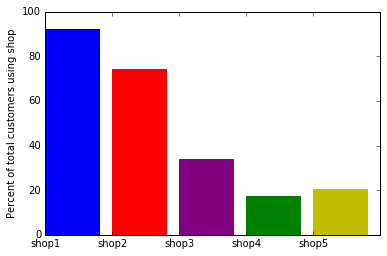

In [9]:

shop_names=['shop1','shop2','shop3','shop4','shop5']
shops =np.arange(1, 6, 1)

barlist = plt.bar(shops,shopu)
barlist[1].set_color('r')
barlist[2].set_color('purple')
barlist[3].set_color('g')
barlist[4].set_color('y')
plt.xticks(shops, shop_names)
plt.ylabel('Percent of total customers using shop')
plt.show()

#### At first glance it seems most customers use shop 1 and 2, and a small subset purchase from shops 3,4, and 5.

#### Let's try and find a possible reason for this trend

In [10]:
x1 = df.distance_shop_1
y1 = df.amount_purchased_shop_1
x2 = df.distance_shop_2
y2 = df.amount_purchased_shop_2
x3 = df.distance_shop_3
y3 = df.amount_purchased_shop_3
x4 = df.distance_shop_4
y4 = df.amount_purchased_shop_4
x5 = df.distance_shop_5
y5 = df.amount_purchased_shop_5

(<matplotlib.collections.PathCollection at 0x1149bbd50>,
 (0, 50000),
 (0, 10000),
 None,
 None)

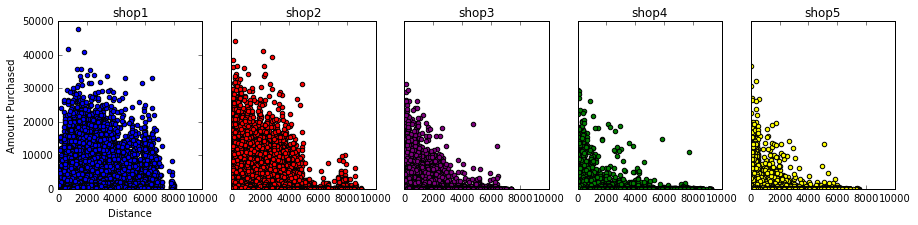

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15,3))

axes[0].scatter(x1,y1), axes[0].set_title("shop1"), axes[0].set_ylim([0,50000]), axes[0].set_xlim([0,10000]),axes[0].get_xaxis().set_visible(True),axes[0].set_xlabel("Distance"), axes[0].set_ylabel("Amount Purchased")
axes[1].scatter(x2,y2,c='red'),axes[1].set_ylim([0,50000]),axes[1].set_xlim([0,10000]),axes[1].set_title("shop2"),axes[1].get_xaxis().set_visible(True),axes[1].get_yaxis().set_visible(False)
axes[2].scatter(x3,y3,c='purple'),axes[2].set_ylim([0,50000]),axes[2].set_xlim([0,10000]),axes[2].set_title("shop3"),axes[2].get_yaxis().set_visible(False),axes[2].get_xaxis().set_visible(True)
axes[3].scatter(x4,y4,c = 'green'),axes[3].set_ylim([0,50000]),axes[3].set_xlim([0,10000]),axes[3].set_title("shop4"),axes[3].get_yaxis().set_visible(False),axes[3].get_xaxis().set_visible(True)
axes[4].scatter(x5,y5, c='yellow'),axes[4].set_ylim([0,50000]),axes[4].set_xlim([0,10000]),axes[4].set_title("shop5"),axes[4].get_yaxis().set_visible(False),axes[4].get_xaxis().set_visible(True)

#### Seems like shop3, shop4 and shop5 are highly dependent on distance to the shop, and maybe shop1 and shop2 are less dependent.

#### Maybe product variety has an influence.

#### Since the dataset doesn't directly tell us variety, we can use the amount of unique products purchased by customers as a relatively accurate estimator 

In [12]:
variety = df[['unique_products_purchased_shop_1','unique_products_purchased_shop_2',
              'unique_products_purchased_shop_3','unique_products_purchased_shop_4',
              'unique_products_purchased_shop_5']].mean()
variety

unique_products_purchased_shop_1    222.299374
unique_products_purchased_shop_2    126.611354
unique_products_purchased_shop_3     31.908094
unique_products_purchased_shop_4     11.568631
unique_products_purchased_shop_5     15.768214
dtype: float64

In [13]:
norm_var = variety/variety.unique_products_purchased_shop_4
norm_var

unique_products_purchased_shop_1    19.215702
unique_products_purchased_shop_2    10.944368
unique_products_purchased_shop_3     2.758156
unique_products_purchased_shop_4     1.000000
unique_products_purchased_shop_5     1.363015
dtype: float64

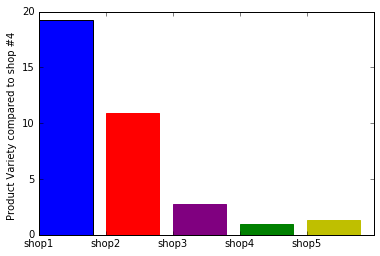

In [14]:
barlist = plt.bar(shops,norm_var)
barlist[1].set_color('r')
barlist[2].set_color('purple')
barlist[3].set_color('g')
barlist[4].set_color('y')
plt.xticks(shops, shop_names)
plt.ylabel('Product Variety compared to shop #4 ')
plt.show()

#### As we can see, shop1 and shop2 have a lot of variety compared to the other 3 shops.
#### Normalizing we can see Shop4 has the least variety and shop1 has approx. 19x the variety as Shop4

#### By the graphs, we might hypothesize that variety and total amount purchased are proportionally related, where as variety and distance to customers are inversely related. As variety increases, the distance to customers becomes less of a factor.  

### Do all customers shop with a similar mindsight? Maybe the group of customers that spend more have different trends?

#### Lets take a look at the top 20% of customers that spend the most. Maybe to 80/20 rule holds.

In [15]:
df['amount_purchased'].describe(percentiles=[.75,.8])

count    60365.000000
mean      4235.493251
std       5006.777082
min          0.212000
50%       2355.138000
75%       6054.631000
80%       7345.430800
max      51588.656000
Name: amount_purchased, dtype: float64

#### The top 20% of customers purchase amount is greater than or equal to 7345.

#### Let's check how much of the gross purchases these '20 percenters' account for.

In [16]:
perc_twenty = df[df['amount_purchased']>7345].amount_purchased.sum()/df['amount_purchased'].sum()
perc_twentyfive = df[df['amount_purchased']>6054].amount_purchased.sum()/df['amount_purchased'].sum()
print (perc_twenty,perc_twentyfive)

(0.5909884818623873, 0.6697901976817722)


#### So 20% of the customers have the total buying power of about 60% of the total customer base.
#### Increasing that to 25% (by 5%) of the top spenders only increases the buying power by 8%. Essentially, it seems like it would be most efficient to target the top 20%, as that would allow the client to allocate finite resources in order to bring in the most revenue possible. 


#### Lets make a graph to see what segment of the customers would bring in the most revenue

In [17]:
cust = df.sort_values('amount_purchased',ascending = False)

In [18]:
x =np.linspace(1,100,num=len(df))
per_cum = cust.amount_purchased/cust.amount_purchased.sum()
per_cum = np.cumsum(per_cum)

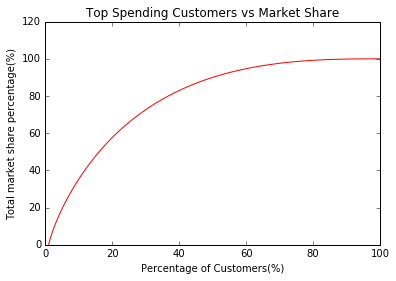

In [19]:
plt.plot(x,per_cum*100,'-r',markersize = 0.1)
plt.xlabel('Percentage of Customers(%)')
plt.ylabel('Total market share percentage(%)')
plt.title('Top Spending Customers vs Market Share')

#### From the graph above we can infer that targeting about 30% of the top customers would bring in close to 70% of the market share. This general target seems like the most efficient way to proceed. 

### Insights and Hypotheses

#### Insights - Looking at the short analysis above:
1. The company should be focusing primarily on the buying habits of the top 30% 
2. The latter 70% of the customers only bring in about 30% of the revenue. Therefore  it would be inefficient and resource draining to allocate time and money to target that section of the population. 

#### Hypotheses 
1. The top 30% enjoys shops with more variety.
2. Distance is less of a factor to the top 30% 
3. Since customers do not buy at all 5 shops(usually only 2), they want the shops that cover all their needs (ie more variety).
4. The more variety a shop has:
        - the more customers will want to buy from there
        - the less it needs to worry about location 

#### Moving Forward
By conducting a more in-depth analysis, such as using clustering techniques and different types of visualization techniques, the goal is to understand that top 30% of customers as best as possible. 